# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [174]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
import joblib 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

#Plotting
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [175]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',200)

In [176]:
#Let's now load the data dictionary and the training datasets
#Which will be used to understand and train the data

df_churn = pd.read_csv('train.csv')
data_dict = pd.read_csv('data_dictionary.csv')

In [177]:
#Have a look at the train data
df_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [178]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [179]:
df_churn.info(max_cols = 172)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [180]:
#Observing percentage of null values in the data
missing_values = (df_churn.isnull().sum()/df_churn.shape[0])*100
missing_values

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [181]:
#Getting the list of columns having more than 70% null values
null_cols = df_churn.columns[(df_churn.isnull().sum()/df_churn.shape[0]) > 0.7]
print(len(null_cols))
print(null_cols)

30
Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


In [182]:
df_churn_copy = df_churn.copy()

### Exploratory Data Analysis and Data cleaning
We will eliminate irrelavant features initially to explore the data, because it is not feasible to explore all the vaiables visually.
Few techniques we can apply -
1. Eliminating singleton columns
2. Eliminating columns with less correlation with data
3. Eliminate the features with high percentage of null values and less correlation with the target variable

In [183]:
#Removing the singleton columns first
df_churn_copy = df_churn_copy.loc[:,df_churn_copy.nunique()>1]

#Also let's drop the id column
df_churn_copy = df_churn_copy.drop(columns = 'id')

df_churn_copy.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0

In [184]:
numerical_df = df_churn_copy.select_dtypes(include = ['int','float'])
categorical_df = df_churn_copy.select_dtypes(include = 'object')

In [185]:
numerical_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00

In [186]:
#Finding the correlation between dependent and independent variables
correlations = numerical_df.corr(method = 'pearson')

In [187]:
#Dealing with null valued columns
num_null_cols = list(set(list(numerical_df.columns)).intersection(set(list(null_cols))))
print(num_null_cols)
print(len(num_null_cols))

['fb_user_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_2g_8', 'night_pck_user_7', 'total_rech_data_6', 'av_rech_amt_data_7', 'total_rech_data_8', 'max_rech_data_8', 'arpu_3g_7', 'max_rech_data_6', 'fb_user_6', 'night_pck_user_6', 'arpu_2g_6', 'arpu_3g_8', 'av_rech_amt_data_6', 'count_rech_2g_8', 'max_rech_data_7', 'night_pck_user_8', 'av_rech_amt_data_8', 'fb_user_8', 'arpu_3g_6', 'count_rech_2g_6', 'arpu_2g_7', 'total_rech_data_7', 'count_rech_3g_8', 'count_rech_2g_7']
27


In [188]:
#Checking the null correlations with the null valued columns
null_corr = correlations.loc[['churn_probability'], num_null_cols].T
null_corr.sort_values(by = 'churn_probability',ascending = False) 

,churn_probability
night_pck_user_6,0.021746
count_rech_3g_6,0.015543
arpu_2g_6,0.015535
arpu_3g_6,0.014532
arpu_2g_7,0.011853
count_rech_3g_7,0.008825
arpu_2g_8,0.005549
arpu_3g_7,0.005474
arpu_3g_8,0.004110
total_rech_data_6,0.003228


In [189]:
#Clearly the correaltions are very less
#So it would be feasible and safe to drop these columns as it will
#help in reducing computational complexity
#help in improving model interpretability

numerical_df = numerical_df.drop(num_null_cols, axis = 1)
numerical_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,5

In [190]:
numerical_df.shape

(69999, 125)

In [191]:
#Lets create the updated set of correaltions
correlations = correlations.loc[numerical_df.columns, numerical_df.columns]

In [192]:
correlations.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
arpu_6,1.000000,0.743730,0.643193,0.446970,0.330179,0.272762,0.612922,0.464946,0.378754,0.129944,0.090652,0.090227,0.234317,0.175521,0.147163,0.233124,0.202040,0.189987,0.428842,0.367097,0.329585,0.186521,0.164597,0.157001,0.066643,0.026609,0.019384,0.425232,0.365293,0.332895,0.361376,0.253030,0.196284,0.383682,0.270095,0.193515,0.085868,0.067382,0.059909,0.487241,0.342787,0.255977,0.419714,0.393167,0.384159,0.120244,0.068850,0.060866,0.047436,0.005676,0.004170,0.667009,0.491677,0.387790,0.105746,0.087340,0.087286,0.232469,0.204434,0.182560,0.066644,0.059865,0.058778,0.224272,0.193703,0.180292,0.103336,0.076024,0.062715,0.110161,0.080980,0.072532,0.036862,0.037745,0.029649,0.141731,0.104692,0.090229,0.274957,0.217625,0.188489,0.029007,-0.083878,-0.052814,0.087536,0.061904,0.061028,0.021861,0.030797,0.016557,0.503610,0.289559,0.198571,0.952776,0.726028,0.626760,0.449690,0.372918,0.323384,0.350010,0.309450,0.220152,0.089947,0.052497,0.038079,0.249904,0.200779,0.190453,0.101695,0.058688,0.047390,0.049431,0.026238,0.029319,0.261292,0.186164,0.179641,0.085993,0.066930,0.050399,0.025875,0.168365,0.184225,0.217785,0.025351
arpu_7,0.743730,1.000000,0.782332,0.321567,0.426994,0.340946,0.468510,0.596461,0.467025,0.098155,0.098596,0.092352,0.169210,0.206873,0.166182,0.179501,0.225661,0.191671,0.327039,0.417139,0.349511,0.163339,0.192326,0.164820,0.037290,0.054498,0.040803,0.326429,0.412918,0.346791,0.253466,0.350044,0.272577,0.284140,0.385933,0.281379,0.070527,0.088741,0.067451,0.351765,0.482150,0.363493,0.388022,0.450583,0.410003,0.084269,0.104049,0.083999,0.023619,0.008810,0.007247,0.492247,0.652750,0.511814,0.074189,0.093734,0.088060,0.171626,0.220368,0.186778,0.054053,0.061525,0.060079,0.164172,0.208048,0.183745,0.077002,0.097228,0.085806,0.080853,0.104761,0.090908,0.037356,0.043559,0.035293,0.106228,0.134137,0.116416,0.197124,0.256449,0.223863,0.007542,-0.057373,-0.041943,0.060764,0.069540,0.061277,0.017402,0.030800,0.020145,0.334458,0.453908,0.309685,0.751131,0.955298,0.767195,0.375192,0.488844,0.405791,0.329590,0.400732,0.273247,0.058506,0.091960,0.061617,0.185759,0.270625,0.217570,0.059918,0.106007,0.059303,0.023609,0.058365,0.044841,0.193652,0.274479,0.204451,0.061

In [193]:
#Let's find out some top 20 correaltions with the target variable
top_corr = correlations['churn_probability'].sort_values(ascending = False, key = abs).head(21)

In [194]:
#Deleteting the churn probability columns itself from the index
top_corr = top_corr.drop('churn_probability')

In [195]:
top_corr

total_ic_mou_8       -0.187566
total_rech_num_8     -0.167043
total_rech_amt_8     -0.160455
max_rech_amt_8       -0.159131
arpu_8               -0.157566
total_og_mou_8       -0.149325
last_day_rch_amt_8   -0.139611
aon                  -0.135177
loc_ic_mou_8         -0.128784
loc_ic_t2m_mou_8     -0.124840
total_ic_mou_7       -0.120197
loc_og_t2m_mou_8     -0.113309
loc_og_mou_8         -0.108821
std_og_mou_6          0.107870
loc_ic_t2m_mou_7     -0.099544
roam_og_mou_8         0.098703
loc_ic_mou_7         -0.098318
loc_og_t2m_mou_7     -0.088988
loc_og_mou_7         -0.087851
roam_og_mou_7         0.086646
Name: churn_probability, dtype: float64

<Axes: >

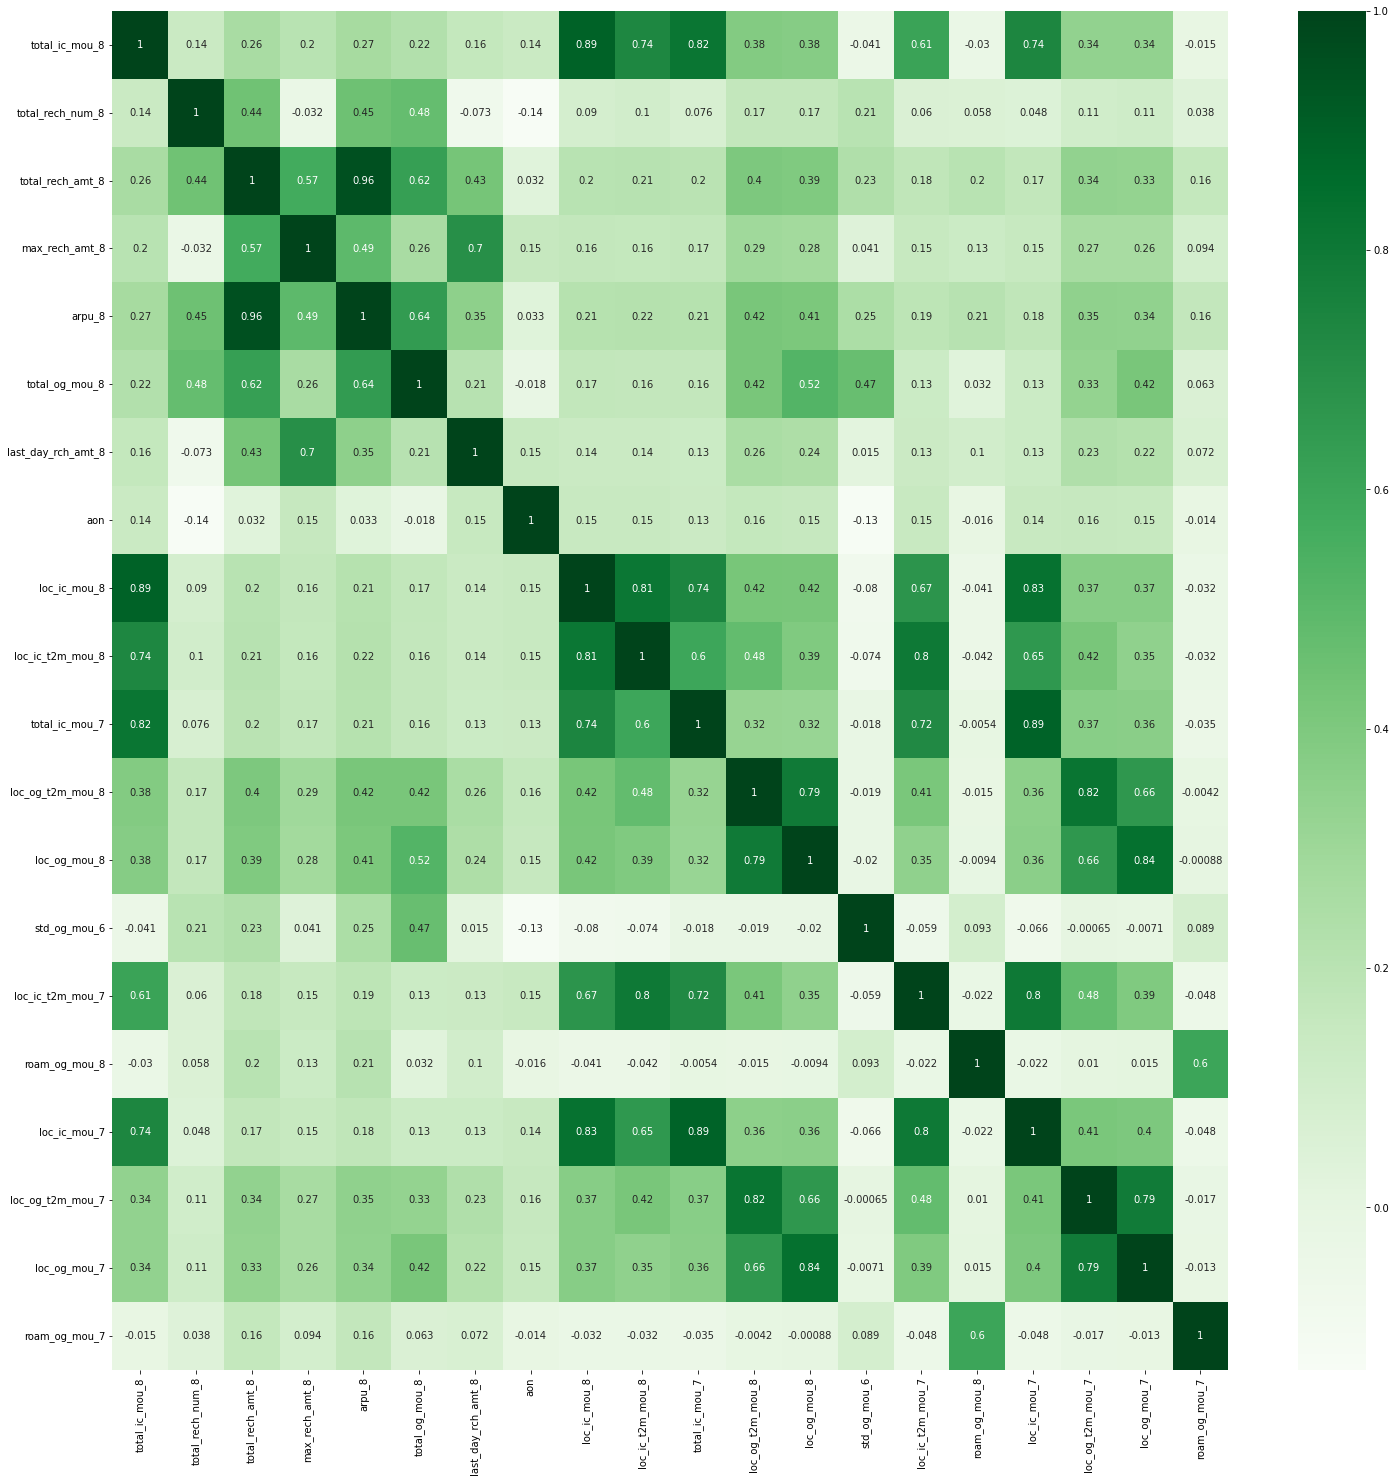

In [196]:
#Heatmap analysis
#To see the multicolinearity in the columns
plt.figure(figsize = (25,25))

sns.heatmap(correlations.loc[top_corr.index,top_corr.index], annot = True, cmap= 'Greens')

#### From the Above Graph we can see that there are lot of multicolinear features.
1. minutes of use is highly correlated with recharge amouts.
2. features with "toal values" have high correlation with 'churn_probability'
3. Applying PCA will definitely help in handling the problem of multicolinearity and bringing the dataset to lower dimesnion

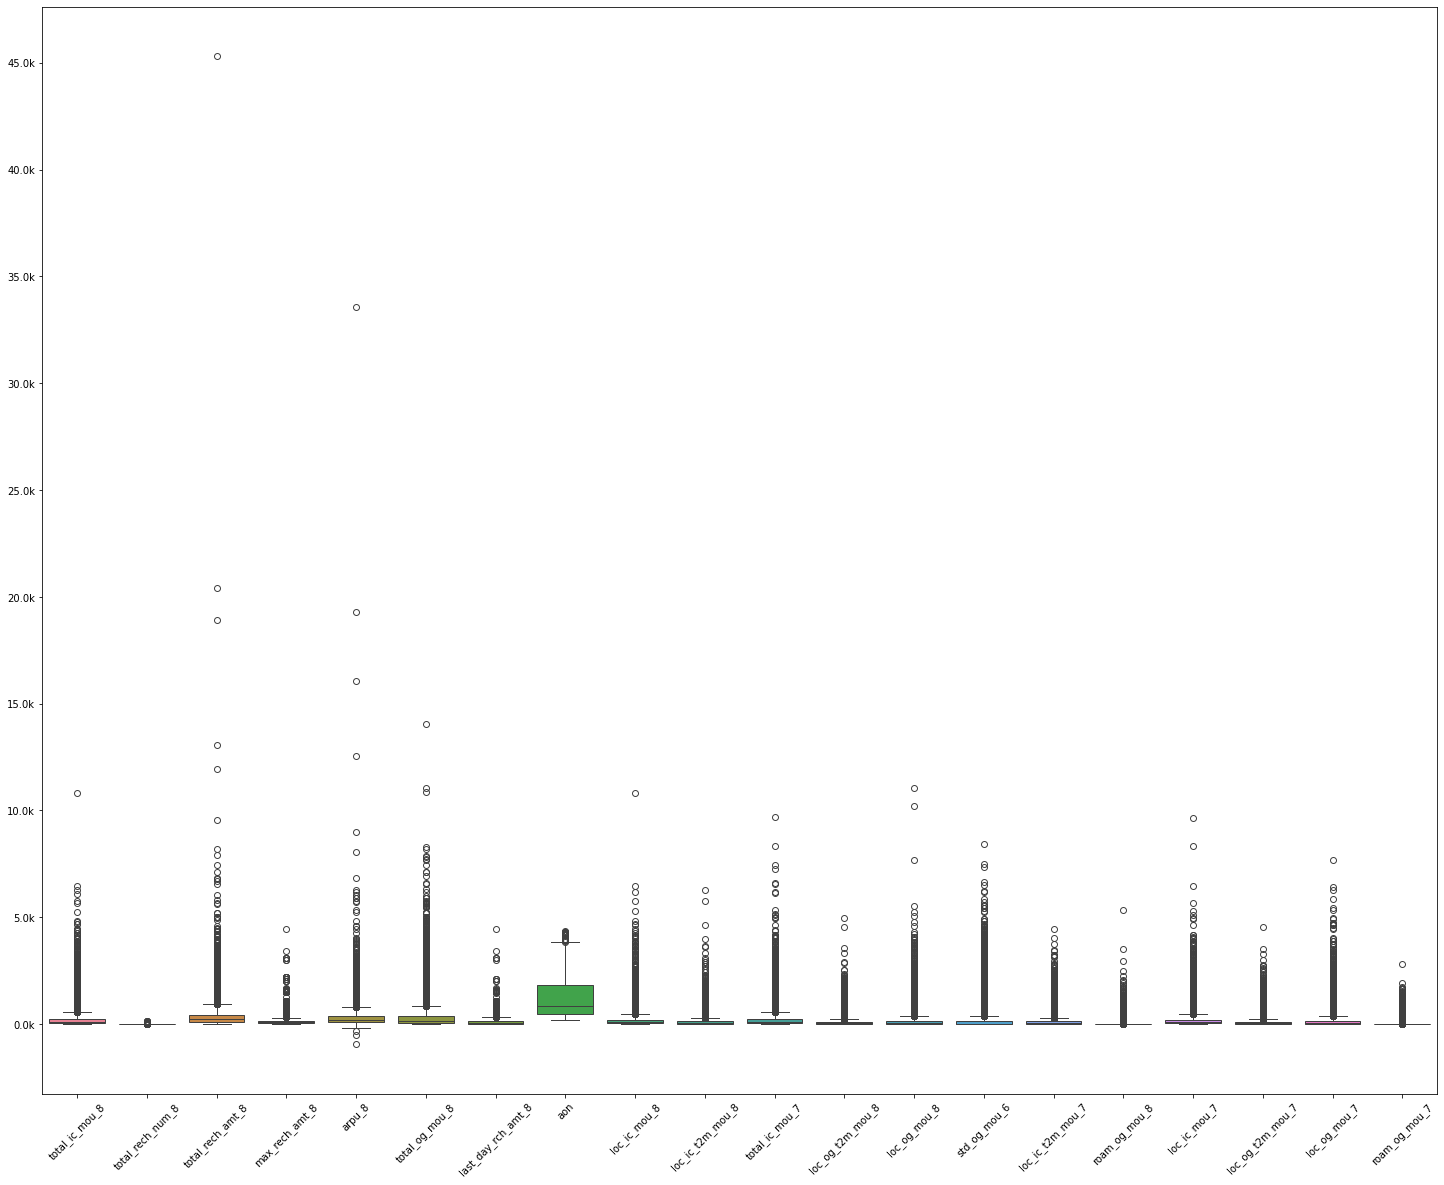

In [197]:
#Let's plot the box plots and histograms to see the data distribution

plt.figure(figsize=(25,20))
plt.xticks(rotation=45)
sns.boxplot(data = numerical_df[top_corr.index])

# Define new tick values (in thousands)
new_tick_values = range(0, 50000, 5000)  # Creates values from 1k to 30k

# Define new tick labels (add 'k' for thousands)
new_tick_labels = [f"{val/1000}k" for val in new_tick_values]

# Set y-axis ticks and labels using plt.yticks()
plt.yticks(new_tick_values, new_tick_labels)
# sns.kdeplot(feature)  # Uncomment for KDE plot
plt.show()


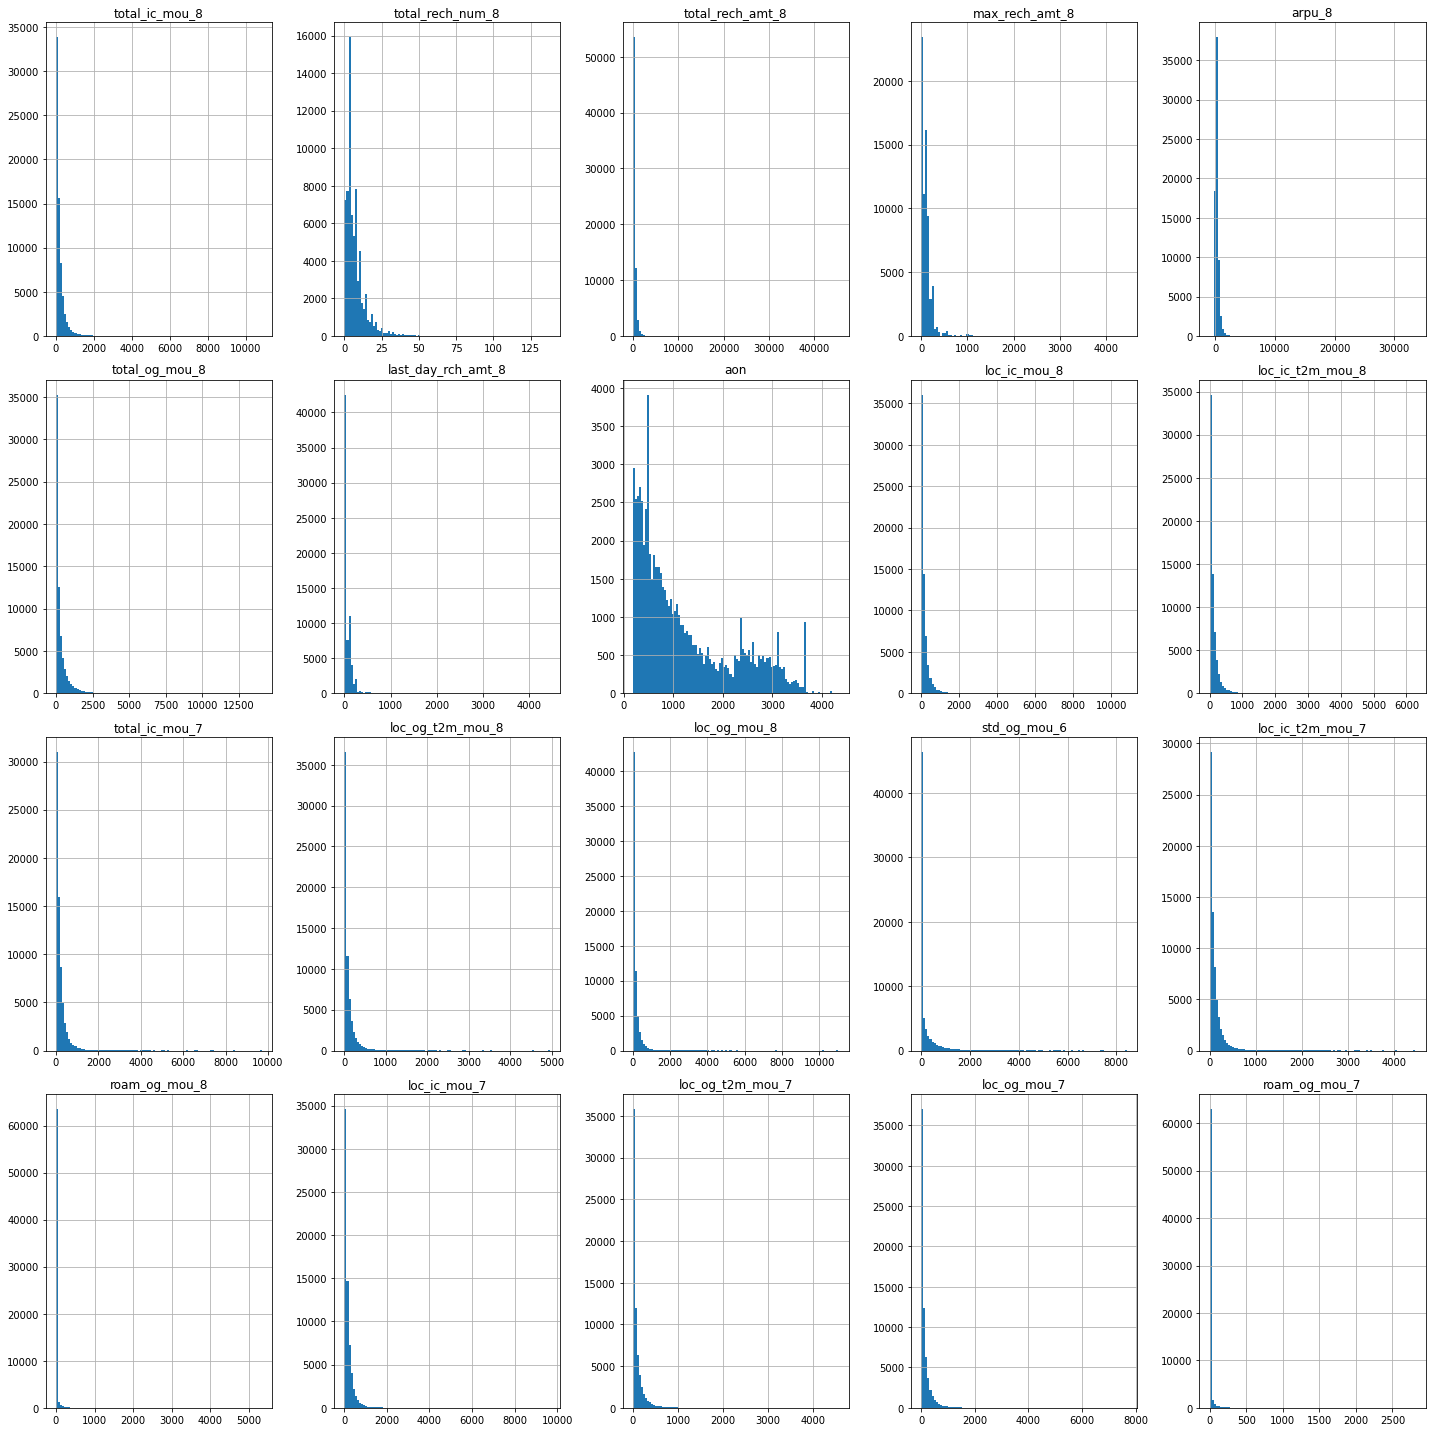

In [198]:
fig=plt.figure(figsize = (20,20))
for i, var_name in enumerate(top_corr.index):
    ax=fig.add_subplot(4,5,i+1)
    numerical_df[var_name].hist(bins=100,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit.
plt.show()

#### The above box plots and histograms suggests that the overall data is right skewed, so outlier handling will play a crucial role in making the model stable

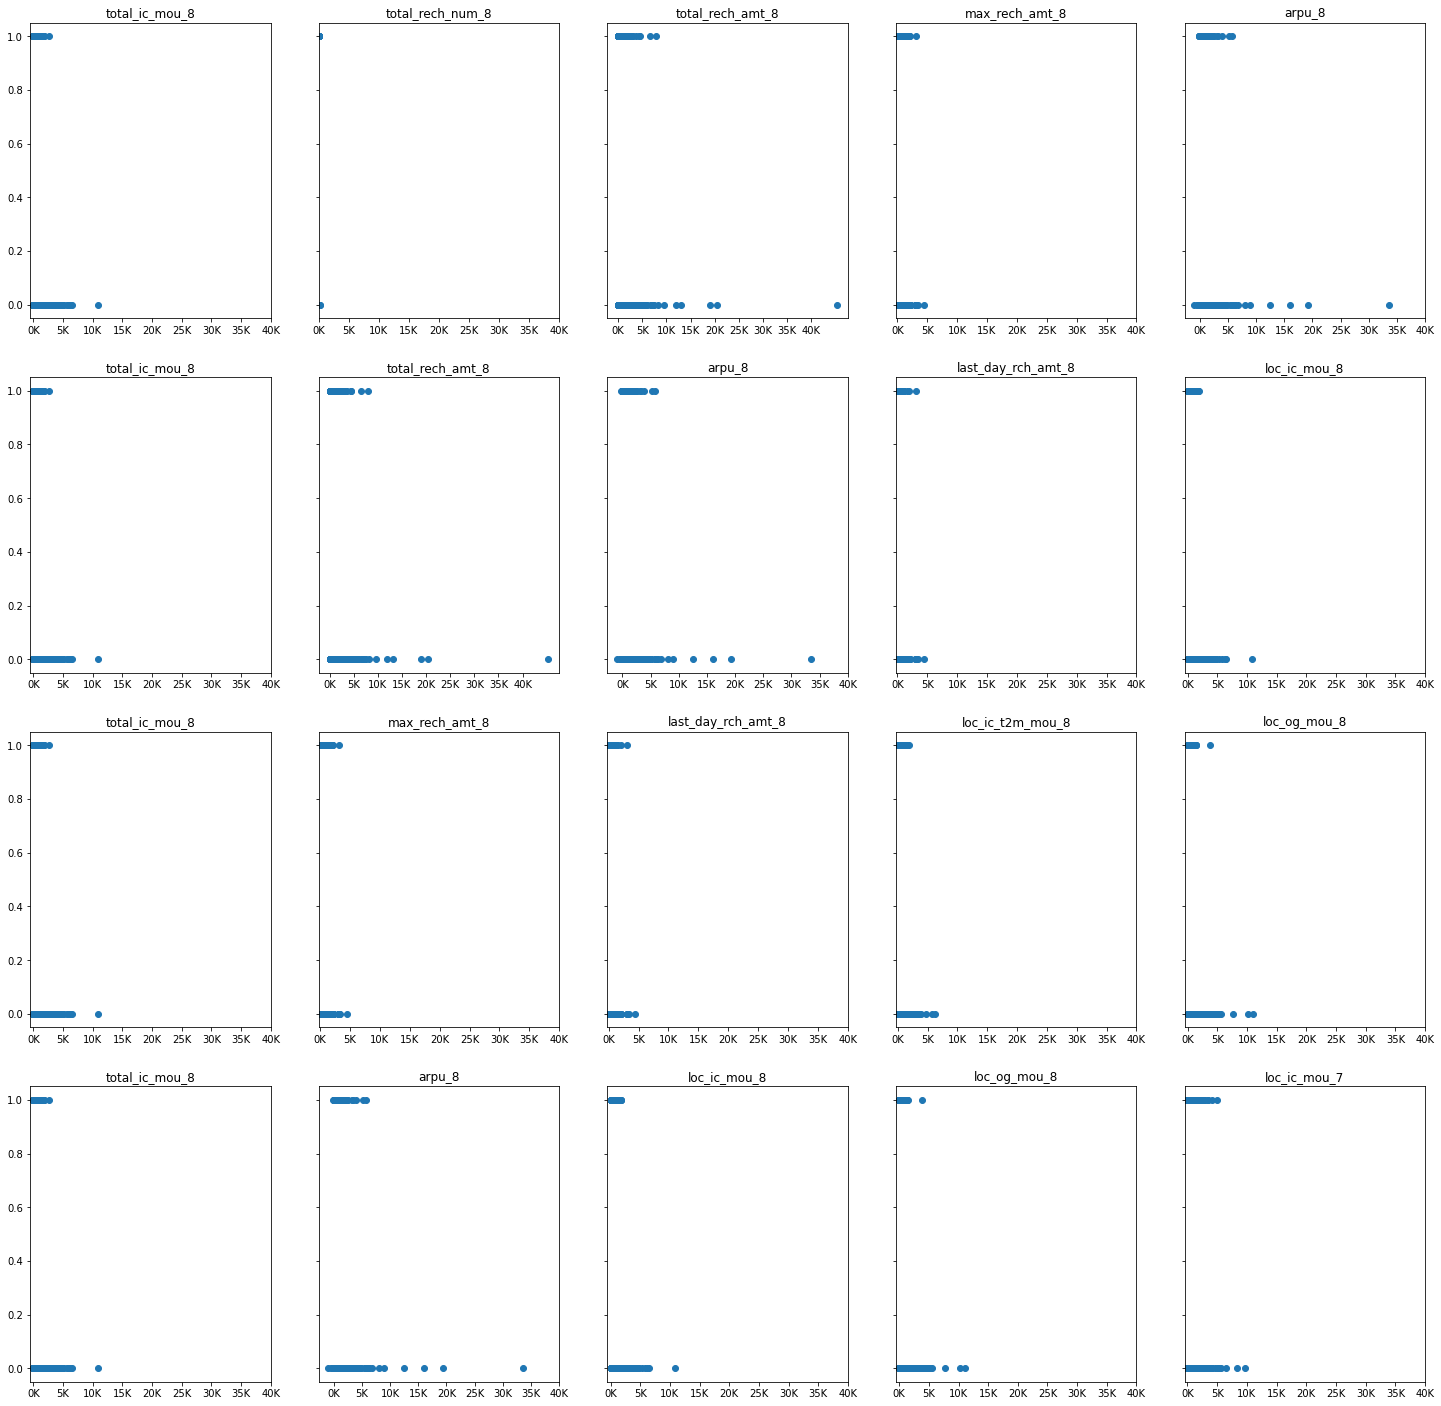

In [199]:
#Let's also look at the relationship between highly correlated feautures with churn
fig, ax = plt.subplots(ncols=5, nrows=4, sharex=False, sharey=True)

fig.set_figheight(25)
fig.set_figwidth(25)

for i in range(0,4):
    for j in range(0,5):
        ax[i][j].scatter(numerical_df[top_corr.index[i*j+j]], numerical_df['churn_probability'])
        ax[i][j].set_title(top_corr.index[i*j+j])
        
        ticks = np.arange(0, 41000, 5000)
        labels = ["{}K".format(i//1000) for i in ticks]
        plt.sca(ax[i][j])
        plt.xticks(ticks, labels)


#### The scatter plots indicate that generally the users with higher usage are less likely to churn as compare to users with low usages.

In [200]:
#Let's look at overall view of distribution in data
skewness = numerical_df.skew()
skewness = pd.DataFrame(skewness).reset_index()
skewness = skewness.rename(columns = {'index':'columns',0:'sk_value'})
skewness = skewness.sort_values(by = 'sk_value', key = abs, ascending = False)
skewness.head()
#Clearly all the skewness values in the dataset is positive indicating 
#The overall data is rightly skewed towards high values

,columns,sk_value
42,isd_og_mou_6,141.593408
44,isd_og_mou_8,139.653487
43,isd_og_mou_7,139.475406
50,og_others_8,130.125779
49,og_others_7,127.397203


In [201]:
#Let's understand the skewness in the data set through describe function
skewness = skewness
numerical_df[skewness['columns']].describe()


,isd_og_mou_6,isd_og_mou_8,isd_og_mou_7,og_others_8,og_others_7,og_others_6,ic_others_6,ic_others_7,ic_others_8,spl_og_mou_7,loc_og_t2c_mou_7,isd_ic_mou_6,std_ic_t2f_mou_8,std_ic_t2t_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,spl_ic_mou_6,roam_ic_mou_7,isd_ic_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_6,roam_ic_mou_8,spl_ic_mou_8,spl_og_mou_6,roam_og_mou_8,std_og_t2f_mou_7,std_og_t2f_mou_6,total_rech_amt_8,loc_og_t2c_mou_6,isd_ic_mou_8,std_ic_t2m_mou_7,spl_ic_mou_7,sachet_3g_8,arpu_7,loc_og_t2t_mou_8,arpu_8,sachet_3g_6,std_ic_t2m_mou_8,vol_3g_mb_6,sachet_3g_7,std_og_t2f_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,std_ic_t2m_mou_6,total_rech_amt_7,loc_ic_t2t_mou_7,std_ic_mou_7,loc_og_t2c_mou_8,roam_ic_mou_6,loc_og_t2t_mou_7,std_ic_mou_8,total_rech_amt_6,roam_og_mou_7,roam_og_mou_6,loc_og_t2t_mou_6,vol_3g_mb_8,loc_ic_t2t_mou_6,loc_og_t2f_mou_7,std_ic_mou_6,arpu_6,vol_3g_mb_7,loc_ic_t2f_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_ic_t2f_mou_8,loc_ic_t2f_mou_6,vol_2g_mb_8,vol_2g_mb_6,jun_vbc_3g,aug_vbc_3g,monthly_3g_7,std_og_t2m_mou_8,vol_2g_mb_7,jul_vbc_3g,last_day_rch_amt_6,monthly_3g_8,loc_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,monthly_3g_6,last_day_rch_amt_8,onnet_mou_8,std_og_t2t_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_6,loc_og_mou_6,max_rech_amt_6,onnet_mou_7,sachet_2g_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2m_mou_8,last_day_rch_amt_7,loc_og_mou_7,sachet_2g_7,offnet_mou_8,sachet_2g_8,onnet_mou_6,loc_og_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_6,total_ic_mou_7,max_rech_amt_8,loc_ic_mou_6,total_ic_mou_8,loc_og_t2m_mou_8,max_rech_amt_7,std_og_mou_8,loc_og_t2m_mou_7,total_ic_mou_6,offnet_mou_7,offnet_mou_6,std_og_mou_7,std_og_mou_6,total_og_mou_8,monthly_2g_8,monthly_2g_6,total_og_mou_7,monthly_2g_7,total_og_mou_6,total_rech_num_6,total_rech_num_7,total_rech_num_8,churn_probability,aon
count,67231.000000,66296.000000,67312.000000,66296.000000,67312.000000,67231.000000,67231.000000,67312.000000,66296.000000,67312.000000,67312.000000,67231.000000,66296.000000,67312.000000,67231.000000,67312.000000,67231.000000,67312.000000,67312.000000,66296.000000,67231.000000,66296.000000,66296.000000,67231.000000,66296.000000,67312.000000,67231.000000,69999.000000,67231.000000,66296.000000,67312.000000,67312.000000,69999.000000,69999.000000,66296.000000,69999.000000,69999.000000,66296.000000,69999.000000,69999.000000,66296.000000,66296.000000,66296.000000,67231.000000,69999.000000,67312.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,67312.000000,67231.000000,67231.000000,69999.000000,67231.000000,67312.000000,67231.000000,69999.000000,69999.000000,67312.000000,67231.000000,66296.000000,66296.000000,67231.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,66296.000000,67312.000000,66296.000000,69999.000000,69999.000000,66296.000000,67231.000000,67312.000000,67231.000000,67231.000000,69999.000000,67312.000000,69999.000000,67312.000000,66296.000000,66296.000000,69999.000000,67312.000000,69999.000000,66296.000000,69999.000000,67231.000000,67231.000000,67312.000000,67231.000000,69999.000000,69999.000000,67231.000000,69999.000000,66296.000000,69999.000000,66296.000000,67312.000000,69999.000000,67312.000000,67231.000000,67312.000000,67231.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.845763,0.841648,0.811100,0.033059,0.024425,0.462581,0.854063,1.019680,0.963214,4.976783,1.361052,7.394167,2.075179,9.873468,2.146273,2.199395,0.061932,7.014568,8.171162,9.910217,9.476958,7.004892,0.040392,3.958619,9.771783,1.084062,1.126377,323.846355,1.126025,8.348424,21.685359,0.033371,0.085487,278.185912,45.686109,278.858826,0.075344,21.089042,122.171882,0.081444,1.057739,5.045027,47.256388,20.734858,322.376363,47.882736,33.760809,1.420840,9.765435,46.166503,33.077030,328.139788,9.842191,14.186457,46.904854,135.486541,48.043255,3.777031,32.360632,283.1343

In [202]:
#Let's look at the data dictionary once again to underatand this behaviour
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


#### The unexpected higher values in the columns may indicate:
1. The business, who tend to use the services more than a regular users
2. high values in roaming may indicate international users or business travellers.
3. The negative values in ARPU  may indicate that the user is in free trial period or offer period etc.

#### Now we may want to treat them as outliers because they can influence the model in higher extent


### Outlier Detection

In [203]:
#Let's separate the independent and dependent features
numerical_df = numerical_df.drop(columns = 'churn_probability')

In [204]:
print(numerical_df.shape)
numerical_df.head()

(69999, 124)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00

In [205]:
#Let's first replace all the negative values in arpu with 0
numerical_df.loc[numerical_df['arpu_6'] < 0, 'arpu_6'] = 0
numerical_df.loc[numerical_df['arpu_7'] < 0, 'arpu_7'] = 0
numerical_df.loc[numerical_df['arpu_8'] < 0, 'arpu_8'] = 0  

In [206]:
import pandas as pd

def outlier_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Upper bound for outliers
    upper_limit = Q3 + 1.5 * IQR

    # Identify outliers based on IQR
    data[data > upper_limit] = upper_limit
    print('number of outliers', len(data[data>upper_limit]))
    return data 


In [207]:
def outliers_z(data,k_right = 3):
    upper_limit = data.mean() + k_right*data.std()
    print('number of outliers', len(data[data>upper_limit]))
    data[data>upper_limit] = upper_limit
    return data

In [208]:
numerical_df_z = numerical_df.apply(outliers_z, axis=0)

number of outliers 943
number of outliers 908


number of outliers 910
number of outliers 1417
number of outliers 1384
number of outliers 1349
number of outliers 1343
number of outliers 1326
number of outliers 1248
number of outliers 854
number of outliers 576
number of outliers 628
number of outliers 943
number of outliers 870
number of outliers 714
number of outliers 770
number of outliers 717
number of outliers 700
number of outliers 1235
number of outliers 1311
number of outliers 1276
number of outliers 1014
number of outliers 986
number of outliers 1019
number of outliers 797
number of outliers 601
number of outliers 864
number of outliers 1220
number of outliers 1230
number of outliers 1163
number of outliers 1455
number of outliers 1454
number of outliers 1406
number of outliers 1355
number of outliers 1349
number of outliers 1299
number of outliers 672
number of outliers 626
number of outliers 659
number of outliers 1539
number of outliers 1489
number of outliers 1445
number of outliers 124
number of outliers 122
number of o

In [209]:
numerical_df_iqr = numerical_df.apply(outliers_z, axis=0)

number of outliers 1731
number of outliers 1724
number of outliers 1711
number of outliers 2472
number of outliers 2450
number of outliers 2391
number of outliers 2226
number of outliers 2228
number of outliers 2141
number of outliers 1872
number of outliers 1495
number of outliers 1497
number of outliers 2047
number of outliers 1863
number of outliers 1750
number of outliers 1820
number of outliers 1772
number of outliers 1722
number of outliers 2116
number of outliers 2202
number of outliers 2143
number of outliers 2129
number of outliers 2157
number of outliers 2117
number of outliers 2035
number of outliers 1862
number of outliers 2079
number of outliers 2099
number of outliers 2135
number of outliers 2085
number of outliers 2580
number of outliers 2553
number of outliers 2534
number of outliers 2455
number of outliers 2471
number of outliers 2395
number of outliers 1673
number of outliers 1583
number of outliers 1621
number of outliers 2516
number of outliers 2490
number of outlie

In [210]:
numerical_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00000,0.000000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.361228,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1958.0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.16578,11.794349,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.010000,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.793188,0.0,0.0,0.000000,0.0,710.0,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00000,0.000000,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.25,2.0,4.0,2.0,70.0,120.0,0.0,70.0,70.0,0.0,70.0,50.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,882.0,0.0,0.0,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00000,8.030000,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,7

### Let's now deal with the Missing values

In [211]:
(numerical_df_z.isnull().sum()/numerical_df.shape[0])*100

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t2t_mou_7      3.838626
std_og_t

In [212]:
# #Let's first do imputation using KNN for nuemrical_df_z

# import pandas as pd
# from sklearn.impute import KNNImputer

# # Create a KNN imputer object
# imputer = KNNImputer(n_neighbors=5)  

# # Impute missing values in the selected features
# numerical_df_z = imputer.fit_transform(numerical_df_z)


In [213]:
# #Let's first do imputation using KNN for nuemrical_df_iqr

# import pandas as pd
# from sklearn.impute import KNNImputer

# # Create a KNN imputer object
# imputer = KNNImputer(n_neighbors=5)  

# # Impute missing values in the selected features
# numerical_df_iqr = imputer.fit_transform(numerical_df_iqr)


In [214]:
# numerical_df_z = pd.DataFrame(numerical_df_z, columns = numerical_df.columns)

In [215]:
# numerical_df_iqr = pd.DataFrame(numerical_df_iqr, columns = numerical_df.columns)

In [216]:
#Verifying the null values again
# (numerical_df_z.isnull().sum()/numerical_df_z.shape[0])*100

In [217]:
#Verifying the null values again
# (numerical_df_iqr.isnull().sum()/numerical_df_iqr.shape[0])*100

In [218]:
# numerical_df_z.to_csv('numerical_df_z.csv',index = False)

In [219]:
# numerical_df_iqr.to_csv('numerical_df_iqr.csv',index = False)

In [220]:
numerical_df_z = pd.read_csv('numerical_df_z.csv')
numerical_df_iqr = pd.read_csv('numerical_df_iqr.csv')

#### Now Let's look at the categorical columns

In [221]:
categorical_df.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [222]:
#Let's look at the null values
categorical_df.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [223]:
#Looing at the null values
(categorical_df.isnull().sum()/categorical_df.shape[0])*100

date_of_last_rech_6          1.572880
date_of_last_rech_7          1.762882
date_of_last_rech_8          3.515765
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
dtype: float64

#### The data is for 2014 only and every almost every customer did a recharge in the month of August,so it won't much contribute to the churn predictions. So let's proceed with the numerical data itself

### Log Tranformation of the Data
Log transformation on the data will bring the right skewed data to normal form

In [224]:
#Splitting the data into train and test sets

X = numerical_df_z
y = df_churn_copy['churn_probability']

In [225]:
#Before applying log transformation let's first verify
#All the values in the dataset are positive

np.all(X >= 0)

True

In [226]:
#Let's tranform the data to log
X_log = np.log(X+1)
X_log.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,3.474355,4.477439,2.143238,3.903588,4.831349,0.828552,3.503754,4.581697,1.202972,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.172482,0.000000,0.246860,1.838961,2.835564,1.202972,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.143589,2.835564,1.283708,3.857356,4.831349,0.698135,2.983153,4.401952,0.000000,0.000000,0.0,0.0,4.191017,5.327828,0.698135,0.0,0.0,0.0,2.219203,0.488580,0.000000,0.322083,0.0,0.0,4.409277,5.405736,1.532557,1.232560,1.543298,2.173615,0.604316,3.094672,2.885359,0.000000,0.000000,0.000000,1.449269,3.248823,3.246880,0.000000,2.152924,0.19062,2.135349,3.042616,2.770086,0.0,0.0,0.0,2.135349,3.352707,2.783776,2.552565,3.989725,3.727138,0.0,0.0,0.395847,0.0,0.0,0.0,0.746688,0.524729,0.000000,1.386294,1.098612,1.098612,4.356709,4.189655,2.397895,4.189655,4.189655,2.397895,4.189655,4.189655,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,7.580189,0.0,0.0,0.0
1,0.000000,4.818562,3.783121,0.000000,0.000000,0.000000,0.000000,3.295466,3.462292,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.135929,3.093197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3.457263,3.486151,0.000000,0.0,0.0,0.000000,3.457263,3.486151,0.985817,3.000222,2.444952,0.879627,2.979603,2.492379,0.300105,0.978326,1.481605,1.490654,3.699819,3.259250,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.490654,3.699819,3.259634,0.0,0.0,0.009950,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.386294,1.609438,1.791759,0.000000,4.983607,3.931826,0.000000,4.983607,3.931826,0.000000,0.000000,0.000000,0.000000,5.869043,0.00000,0.0,1.601406,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.693147,0.0,0.0,0.000000,0.0,6.566672,0.0,0.0,0.0
2,4.124000,4.646082,0.000000,0.425268,2.829087,0.000000,4.007151,4.419443,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.425268,2.637628,0.000000,3.223266,0.000000,0.000000,0.00000,0.000000,0.000000,1.144223,0.000000,0.000000,3.244154,2.637628,0.000000,0.000000,1.371181,0.000000,3.3991

### Train and Test Split
we will apply log transforamtion to the data before splitting it as the data is severly right skewed

In [227]:
# Let's divide the dataset
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42, stratify=y)


In [228]:
#Look at the shape of the sets
print(X_train.shape)
print(X_test.shape)

(55999, 124)
(14000, 124)


In [229]:
#Convert the datasets to csv
X_train.to_csv('X_train.csv',index = False)
X_test.to_csv('X_test.csv',index = False)
y_train.to_csv('y_train.csv',index = False)
y_test.to_csv('y_test.csv',index = False)

In [230]:
#Let's apply Logarithmic transformation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Let'd transform on the 
X_test_scaled = scaler.transform(X_test)

In [231]:
#convert the columns again to the data frames
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_log.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_log.columns)

In [232]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.302124,0.535981,0.658669,0.658549,1.465721,1.561153,-0.893141,-0.036487,0.514227,0.302534,-0.385211,-0.387436,2.173531,-0.397987,-0.395444,-1.406889,0.175115,0.195675,-0.931256,0.037512,0.482835,-0.637123,-0.638115,-0.630255,-0.407223,3.300529,2.234368,-1.128137,0.011313,0.348965,1.151355,1.998100,2.101158,-0.208793,0.466776,1.067848,-0.304565,-0.294041,-0.293227,0.630225,1.386501,1.514955,-0.163687,-0.156129,3.029173,-0.659739,1.706412,1.479488,-0.386102,-0.048356,-0.054047,-0.108980,0.845499,0.991410,-1.083810,-0.053441,0.786739,-1.332818,-0.178663,0.224559,-0.847997,-0.851384,-0.857982,-1.437169,-0.263489,0.305684,-0.659101,0.849016,0.175124,-0.955282,0.158804,0.791652,-0.396291,-0.397016,-0.400835,-1.161084,0.314438,0.546809,-1.431774,-0.206584,0.277671,-0.448826,-0.314454,-0.338324,-0.357027,-0.371547,-0.366410,-0.336763,0.948881,0.382591,-0.157747,0.413382,-0.030690,0.182543,0.601529,0.628332,0.474316,0.487723,0.640367,-1.524585,0.968043,1.037975,-0.475652,-0.476943,-0.457622,-0.398187,-0.410965,-0.419241,-0.280032,-0.286104,3.551777,-0.355069,-0.360882,-0.371203,-0.246474,-0.24388,-0.252295,-0.203805,-0.20108,-0.203642,-0.055152,-0.423562,-0.413829,-0.398753
1,0.470038,-0.732782,-2.906627,0.620661,0.161087,-0.681293,0.817416,-0.635504,-1.036710,-0.449094,-0.385211,-0.067009,-0.465268,-0.397987,0.823956,0.977029,-0.085678,-0.558674,1.170649,-0.310898,-0.540769,0.820801,-0.638115,-0.630255,3.686045,2.389463,-0.437275,1.035107,-0.302910,-0.603481,0.871967,0.765002,-0.674354,0.584615,-0.582641,-0.932298,-0.287837,-0.294041,-0.293227,0.595402,0.283297,-1.010247,-0.163687,-0.156129,-0.149843,2.203622,1.550937,-0.643866,-0.386102,-0.048356,-0.054047,0.678688,-0.177357,-2.120727,1.099120,0.096123,-0.761367,1.030713,0.157143,-1.171147,1.605913,0.752319,0.213786,0.984978,0.098854,-0.997875,0.157730,-0.662028,-0.653335,-0.955282,-0.949978,-0.327168,-0.396291,-0.397016,-0.400835,-0.526450,-1.154167,-0.571296,0.826543,-0.018296,-2.341659,2.332405,-0.314454,-0.338324,-0.357027,-0.371547,-0.366410,4.039994,-0.334579,-0.101349,0.070483,-1.848366,-2.433319,0.476316,-2.453722,-2.288544,0.569031,-2.422674,-2.251347,0.495886,-1.344512,-1.304482,-0.475652,-0.476943,-0.478413,-0.398187,-0.4

### Feature Selection and Extraction

In [233]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2  # Example for filter methods
from sklearn.feature_selection import RFE  # Example for wrapper methods
from sklearn.linear_model import Lasso  # Example for embedded methods

In [234]:
# Create the RFE object with Logistic Regression estimator and specify top 50 features
selector = RFE(estimator=LogisticRegression(), n_features_to_select=50)

# Fit the model on the training data
selector.fit(X_train_scaled, y_train)

# Get the mask of selected features
selected_features = selector.get_support(indices=True)



In [235]:
# Get the original feature names based on the mask
top_50_features = [X_train_scaled.columns[i] for i in selected_features]

print("Top 50 Features:", top_50_features)

Top 50 Features: ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_7', 'aon', 'aug_vbc_3g']


In [236]:
X_train_rfe = X_train_scaled[top_50_features]
X_test_rfe = X_test_scaled[top_50_features]
X_train_rfe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_8,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_7,aon,aug_vbc_3g
0,-0.302124,0.535981,0.658669,0.658549,1.465721,1.561153,-0.893141,-0.036487,0.514227,-0.385211,-0.397987,-0.395444,0.011313,0.348965,1.151355,2.101158,-0.208793,-0.304565,0.630225,1.514955,3.029173,1.479488,-0.054047,-0.108980,0.845499,0.991410,0.224559,0.305684,0.175124,-0.396291,-0.400835,-1.161084,0.546809,-0.206584,0.277671,-0.338324,-0.366410,-0.030690,0.182543,0.601529,0.628332,0.474316,0.487723,1.037975,-0.476943,-0.457622,-0.419241,-0.286104,-0.055152,-0.423562
1,0.470038,-0.732782,-2.906627,0.620661,0.161087,-0.681293,0.817416,-0.635504,-1.036710,-0.385211,-0.397987,0.823956,-0.302910,-0.603481,0.871967,-0.674354,0.584615,-0.287837,0.595402,-1.010247,-0.149843,-0.643866,-0.054047,0.678688,-0.177357,-2.120727,-1.171147,-0.997875,-0.653335,-0.396291,-0.400835,-0.526450,-0.571296,-0.018296,-2.341659,-0.338324,-0.366410,-2.433319,0.476316,-2.453722,-2.288544,0.569031,-2.422674,-1.304482,-0.476943,-0.478413,-0.419241,-0.286104,-0.785938,-0.423562
2,0.192098,0.240227,0.787816,1.059716,1.335814,1.795646,0.256792,0.717342,0.108677,-0.385211,-0.397987,-0.395444,-0.945770,-1.005419,1.615917,2.318811,0.918233,-0.304565,1.138762,1.682979,-0.149843,-0.740543,-0.054047,0.560826,0.902222,1.124451,0.176621,-0.095162,1.652156,-0.396291,-0.400835,0.598868,1.184609,-0.293538,0.232259,-0.338324,1.485349,0.355072,0.397483,0.412330,0.710113,0.474316,0.487723,-1.304482,-0.476943,-0.478413,-0.419241,-0.286104,0.154209,-0.423562
3,-0.033455,0.069898,0.124634,0.625248,0.522717,0.607030,-1.311764,-0.391315,-0.404600,-0.385211,-0.397987,-0.395444,0.504132,0.545267,-0.754198,-0.114203,-0.965001,-0.304565,-1.105577,-0.441912,-0.149843,0.887572,-0.054047,0.057335,0.084141,0.165952,0.013250,0.616453,-0.266418,-0.396291,-0.400835,-1.161084,-0.850770,0.481199,0.526713,-0.338324,-0.366410,0.355072,0.094598,0.150098,0.232208,-0.329589,-0.300537,0.345496,-0.476943,-0.478413,-0.419241,-0.286104,-0.685677,-0.423562
4,0.240241,0.171304,0.253336,-0.609620,-0.274470,-0.506961,0.611961,0.457681,0.476545,-0.385211,-0.397987,-0.395444,-0.302238,-0.415118,-0.754198,-0.738061,1.431224,2.367188,1.043334,0.926768,-0.149843,-0.740543,-0.054047,0.390252,0.275265,0.289464,-0.152498,-0.207045,-0.653335,-0.396291,0.485854,0.746373,0.982004,-0.353192,0.057103,-0.338324,-0.366410,-0.275171,0.323147,0.358385,0.363316,0.988547,0.991947,1.350413,-0.476943,-0.473138,2.114952,-0.286104,1.156711,0.501534


### Let's apply different models on these columns

In [ ]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# # Define the models and parameter grids for GridSearchCV
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier()
# }

# param_grids = {
#     'Logistic Regression': {
#         'C': [0.01, 0.1, 1, 10],
#         'solver': ['liblinear']
#     },
#     'Random Forest': {
#         'n_estimators': [100, 200, 500],
#         'max_depth': [3, 5, 8]
#     },
#     'Gradient Boosting': {
#         'n_estimators': [100, 200, 500],
#         'learning_rate': [0.1, 0.01, 0.001]
#     }
# }

# # Perform GridSearchCV for each model
# best_models = {}
# for model_name, model in models.items():
#     grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
#     grid_search.fit(X_train_rfe, y_train)
#     best_models[model_name] = grid_search.best_estimator_

# # Evaluate the best models on the test set
# for model_name, model in best_models.items():
#     y_pred = model.predict(X_train_rfe)
#     accuracy = accuracy_score(y_train, y_pred)
#     f1 = f1_score(y_train, y_pred, average='macro')
#     print(f"{model_name} Performance:")
#     print(f"\tAccuracy: {accuracy:.4f}")
#     print(f"\tF1-score (Macro): {f1:.4f}")



### Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the models and parameter grids for GridSearchCV
models = {
    'Logistic Regression': LogisticRegression(),
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    grid_search_log = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search_log.fit(X_train_rfe, y_train)
    best_models[model_name] = grid_search_log.best_estimator_

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_train_rfe)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='macro')
    conf_mat = confusion_matrix(y_train, y_pred)
    print(f"{model_name} Performance:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tF1-score (Macro): {f1:.4f}")
    print(f"\tConfusion matrix:\n {conf_mat}")



Logistic Regression Performance:
	Accuracy: 0.9402
	F1-score (Macro): 0.8211
	Confusion matrix:
 [[49173  1120]
 [ 2228  3478]]


### Let's apply PCA

In [ ]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=25)  # Calculate all components by default

pca.fit(X_train_rfe)

pca.explained_variance_ratio_

array([0.24954723, 0.11074881, 0.07767799, 0.06587055, 0.04713165,
       0.04291832, 0.03639119, 0.02651231, 0.02522326, 0.02388175,
       0.02075644, 0.02011839, 0.01985658, 0.01796672, 0.0176531 ,
       0.01554622, 0.01487451, 0.01422483, 0.01346088, 0.01320983,
       0.01277278, 0.01189041, 0.01082564, 0.00999504, 0.00892603])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9279804507408758

In [ ]:
#let's transform the data
x_train_pca = pca.transform(X_train_rfe)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the models and parameter grids for GridSearchCV
models = {
    'Logistic Regression': LogisticRegression(),
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    grid_search_log = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search_log.fit(x_train_pca, y_train)
    best_models[model_name] = grid_search_log.best_estimator_

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(x_train_pca)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='macro')
    conf_mat = confusion_matrix(y_train, y_pred)
    print(f"{model_name} Performance:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tF1-score (Macro): {f1:.4f}")
    print(f"\tConfusion matrix:\n {conf_mat}")



Logistic Regression Performance:
	Accuracy: 0.9308
	F1-score (Macro): 0.7880
	Confusion matrix:
 [[49037  1256]
 [ 2621  3085]]


#### No difference has been seen after applying PCA

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the models and parameter grids for GridSearchCV
models = {
    'Random Forest': RandomForestClassifier()
}

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 8]
    },
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    grid_search_rf = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search_rf.fit(X_train_rfe, y_train)
    best_models[model_name] = grid_search_rf.best_estimator_

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_train_rfe)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='macro')
    conf_mat = confusion_matrix(y_train, y_pred)
    print(f"{model_name} Performance:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tF1-score (Macro): {f1:.4f}")
    print(f"\tConfusion matrix: {conf_mat}")



Random Forest Performance:
	Accuracy: 0.9456
	F1-score (Macro): 0.8352
	Confusion matrix: [[49391   902]
 [ 2145  3561]]


#### The F1-score improved a bit in case of random forest

In [ ]:
import joblib 

# Save the model to a file

joblib.dump(grid_search_rf.best_estimator_, 'RandomForest_z.pickle')
joblib.dump(grid_search_log.best_estimator_, 'LogisticRegression_z.pickle')


['LogisticRegression_z.pickle']

#### Predicting Test Data

In [ ]:
# Load the Logistic Regression model
log_model = joblib.load('LogisticRegression_z.pickle') 
  
# Use the loaded model to make predictions 
y_test_pred = log_model.predict(X_test_rfe) 

f1 = f1_score(y_test, y_test_pred, average='macro')
conf_mat = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"{'RandomForest'} Performance:")
print(f"\tTest Accuracy: {accuracy:.4f}")
print(f"\tTest F1-score (Macro): {f1:.4f}")
print(f"\tTest Confusion matrix: {conf_mat}")

RandomForest Performance:
	Test Accuracy: 0.9361
	Test F1-score (Macro): 0.8042
	Test Confusion matrix: [[12297   277]
 [  618   808]]


In [ ]:
#Load the Random Forest Classifier
rf_model = joblib.load('RandomForest_z.pickle') 
  
# Use the loaded model to make predictions 
y_test_pred = rf_model.predict(X_test_rfe) 

f1 = f1_score(y_test, y_test_pred, average='macro')
conf_mat = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"{'RandomForest'} Performance:")
print(f"\tTest Accuracy: {accuracy:.4f}")
print(f"\tTest F1-score (Macro): {f1:.4f}")
print(f"\tTest Confusion matrix: {conf_mat}")

RandomForest Performance:
	Test Accuracy: 0.9404
	Test F1-score (Macro): 0.8142
	Test Confusion matrix: [[12353   221]
 [  613   813]]


#### Let's apply Gradient Boosting now

In [ ]:

# Define the models and parameter grids for GridSearchCV
models = {
    'Gradient Boosting': GradientBoostingClassifier()
}

param_grids =  {
    'Gradient Boosting': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001]
    }
    }

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    grid_search_gb = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search_gb.fit(X_train_rfe, y_train)
    best_models[model_name] = grid_search_gb.best_estimator_

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_train_rfe)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='macro')
    print(f"{model_name} Performance:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tF1-score (Macro): {f1:.4f}")



Gradient Boosting Performance:
	Accuracy: 0.9473
	F1-score (Macro): 0.8448


In [ ]:
print(grid_search_gb.best_params_)

{'learning_rate': 0.1, 'n_estimators': 200}


In [238]:
##Applying Gradient boosting
model_gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 200)

In [240]:
model_gb.fit(X_train_rfe, y_train)

GradientBoostingClassifier(n_estimators=200)

In [241]:
joblib.dump(model_gb, 'GradientBoosting.pickle')

['GradientBoosting.pickle']

In [242]:
y_pred = model_gb.predict(X_train_rfe)
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='macro')
print(f"{model_name} Performance:")
print(f"\tAccuracy: {accuracy:.4f}")
print(f"\tF1-score (Macro): {f1:.4f}")
print(f"\tTest Confusion matrix: {conf_mat}")

Logistic Regression Performance:
	Accuracy: 0.9473
	F1-score (Macro): 0.8448
	Test Confusion matrix: [[50215    78]
 [ 5645    61]]


In [ ]:
joblib.dump(grid_search_gb.best_estimator_, 'GradientBoosting.pickle')

['GradientBoosting.pickle']

### Now Let's try with VIF

In [ ]:
#Slelecting top 50 features with VIF
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Loading all the train and test data sets
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
print('train shape', X_train.shape)
print('test shape', X_test.shape)

train shape (55999, 124)
test shape (14000, 124)


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,loc_og_mou_7,64.87
29,loc_og_mou_8,62.87
27,loc_og_mou_6,59.91
64,loc_ic_mou_7,55.12
65,loc_ic_mou_8,51.73
...,...,...
50,og_others_8,1.25
49,og_others_7,1.25
81,spl_ic_mou_6,1.25
82,spl_ic_mou_7,1.20


In [ ]:
vif.to_csv('vif_results.csv')

In [ ]:
top_50_vif = vif.sort_values(by = 'VIF', ascending = True).head(50)
top_50_vif.head()

,Features,VIF
83,spl_ic_mou_8,1.15
82,spl_ic_mou_7,1.20
49,og_others_7,1.25
81,spl_ic_mou_6,1.25
50,og_others_8,1.25


In [ ]:
top_50_feat_vif = [col for col in top_50_vif['Features']]

In [ ]:
X_train_vif = X_train[top_50_feat_vif]
X_test_vif = X_test[top_50_feat_vif]
X_train_vif.head()

,spl_ic_mou_8,spl_ic_mou_7,og_others_7,spl_ic_mou_6,og_others_8,aon,ic_others_6,ic_others_8,og_others_6,ic_others_7,...,monthly_2g_7,monthly_3g_7,sachet_2g_8,monthly_3g_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_8,sachet_2g_6,sachet_2g_7,loc_ic_t2f_mou_7,vol_2g_mb_8
0,-0.338324,-0.314454,-0.048356,-0.448826,-0.054047,-0.055152,-0.336763,0.382591,-0.386102,0.948881,...,-0.286104,-0.24388,-0.371203,-0.252295,-0.847997,-0.857982,-0.355069,-0.360882,-0.851384,-0.457622
1,-0.338324,-0.314454,-0.048356,2.332405,-0.054047,-0.785938,4.039994,-0.101349,-0.386102,-0.334579,...,-0.286104,-0.24388,-0.371203,-0.252295,1.605913,0.213786,-0.355069,-0.360882,0.752319,-0.478413
2,-0.338324,-0.314454,-0.048356,-0.448826,-0.054047,0.154209,-0.336763,-0.343705,-0.386102,-0.334579,...,-0.286104,-0.24388,-0.371203,-0.252295,-0.847997,-0.857982,-0.355069,-0.360882,-0.851384,-0.478413
3,-0.338324,2.052832,-0.048356,2.912005,-0.054047,-0.685677,0.928940,5.378588,1.340510,-0.334579,...,-0.286104,-0.24388,-0.371203,-0.252295,1.559762,0.633890,-0.355069,-0.360882,1.252185,-0.478413
4,-0.338324,-0.314454,-0.048356,-0.448826,-0.054047,1.156711,0.364009,-0.157402,-0.386102,0.151082,...,-0.286104,-0.24388,1.197113,-0.252295,-0.024952,-0.857982,-0.355069,-0.360882,-0.851384,-0.473138


### Let's apply Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the models and parameter grids for GridSearchCV
models = {
    'Logistic Regression': LogisticRegression(),
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    grid_search_log = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search_log.fit(X_train_vif, y_train)
    best_models[model_name] = grid_search_log.best_estimator_

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_train_vif)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='macro')
    conf_mat = confusion_matrix(y_train, y_pred)
    print(f"{model_name} Performance:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tF1-score (Macro): {f1:.4f}")
    print(f"\tConfusion matrix:\n {conf_mat}")



Logistic Regression Performance:
	Accuracy: 0.9033
	F1-score (Macro): 0.5967
	Confusion matrix:
 [[49708   585]
 [ 4828   878]]


### Saving Top 50 features to Preprocess the test data

In [ ]:
# Create the RFE object with Logistic Regression estimator and specify top 50 features
selector = RFE(estimator=LogisticRegression(), n_features_to_select=50)

# Fit the model on the training data
selector.fit(X_train, y_train)

# Get the mask of selected features
selected_features = selector.get_support(indices=True)



In [ ]:
# Get the original feature names based on the mask
top_50_feat_rfe = [X_train.columns[i] for i in selected_features]

print("Top 50 Features:", top_50_features)

Top 50 Features: ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_7', 'aon', 'aug_vbc_3g']


In [ ]:
X_train_rfe = X_train[top_50_feat_rfe]

In [ ]:
X_train_rfe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,...,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_8,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_7,aon,aug_vbc_3g
0,-0.302124,0.535981,0.658669,0.658549,1.465721,1.561153,-0.893141,-0.036487,0.514227,-0.385211,...,0.628332,0.474316,0.487723,1.037975,-0.476943,-0.457622,-0.419241,-0.286104,-0.055152,-0.423562
1,0.470038,-0.732782,-2.906627,0.620661,0.161087,-0.681293,0.817416,-0.635504,-1.036710,-0.385211,...,-2.288544,0.569031,-2.422674,-1.304482,-0.476943,-0.478413,-0.419241,-0.286104,-0.785938,-0.423562
2,0.192098,0.240227,0.787816,1.059716,1.335814,1.795646,0.256792,0.717342,0.108677,-0.385211,...,0.710113,0.474316,0.487723,-1.304482,-0.476943,-0.478413,-0.419241,-0.286104,0.154209,-0.423562
3,-0.033455,0.069898,0.124634,0.625248,0.522717,0.607030,-1.311764,-0.391315,-0.404600,-0.385211,...,0.232208,-0.329589,-0.300537,0.345496,-0.476943,-0.478413,-0.419241,-0.286104,-0.685677,-0.423562
4,0.240241,0.171304,0.253336,-0.609620,-0.274470,-0.506961,0.611961,0.457681,0.476545,-0.385211,...,0.363316,0.988547,0.991947,1.350413,-0.476943,-0.473138,2.114952,-0.286104,1.156711,0.501534


In [ ]:
X_train_rfe.to_csv('X_train_rfe.csv',index = False)